## Student Database Managment System

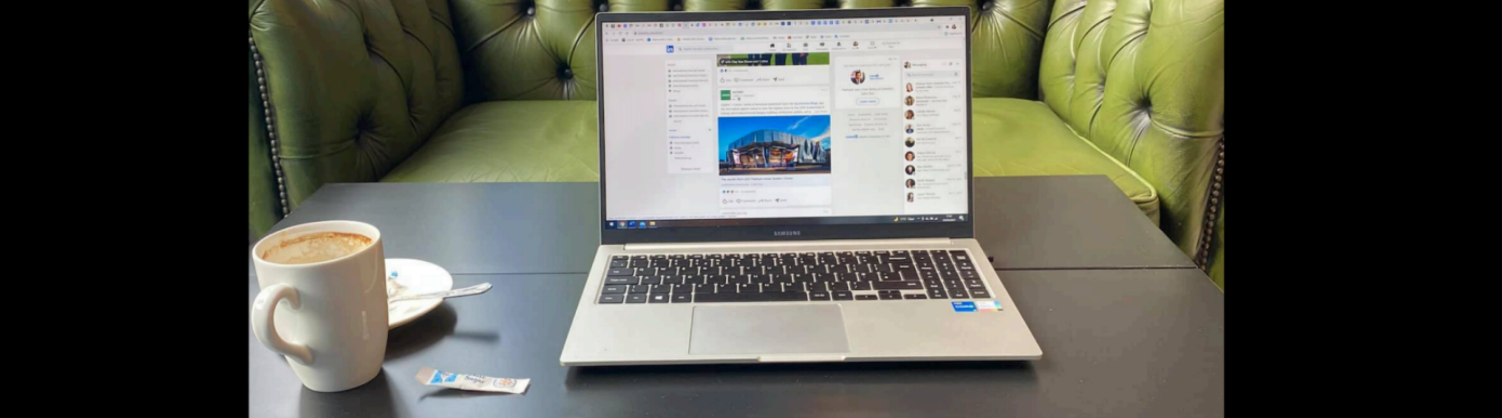

### HEMANT THAPA

# Table of Contents

1. **Creating Database:**
    - Importing libraries and connecting to the database.
    - Creating a cursor and executing SQL commands to create a table.
    - Committing changes and displaying the table structure.

2. **Adding Student Details:**
    - Inserting a new student's details into the table.
    - Displaying all rows in the table after insertion.

3. **Editing and Updating Details:**
    - Updating a student's details based on their `student_id`.
    - Displaying the updated rows in the table.

4. **Deleting Details:**
    - Selecting and displaying details of a student based on their `student_id`.
    - Deleting the selected student's details.
    - Displaying the updated rows in the table after deletion.


### 1. Libraries 

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

### 2. Creatind database

In [2]:
db_file = "database_student_details.db"

In [3]:
print(db_file)

database_student_details.db


### 2. Conncetion Setup 

conn is an object representing a connection to an SQLite database. This object is usually created by calling the sqlite3.connect() function, where we provide the path or name of the SQLite database file.

In [4]:
conn = sqlite3.connect(db_file)

In [5]:
print(conn)

a cursor is a control structure that enables traversal over the records in a database. In the sqlite3 module, the cursor() method is called on the connection object (conn) to create a cursor object. This cursor object is then used to execute SQL commands and fetch results.

In [6]:
cursor = conn.cursor()

In [7]:
print(cursor)

### 3. Create Table

In [8]:
#creating a table
create_table = """
CREATE TABLE IF NOT EXISTS student_details (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    date_of_birth DATE,
    gender TEXT,
    email TEXT UNIQUE,
    phone_number TEXT,
    address TEXT,
    registration_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);
"""

In [9]:
#execute SQL commands
cursor.execute(create_table)

Save the changes made to the database. In this case, it commits the table creation.

In [10]:
#commit the changes
conn.commit()

execute an SQL command to retrieve information about the columns of the student_details using the PRAGMA statement.

In [11]:
#execute SQL command to get table information
cursor.execute("PRAGMA table_info(student_details)")

In [12]:
#fetch all rows from the result set
columns = cursor.fetchall()

In [13]:
#display column information
for i in columns:
    print(i)

(0, 'student_id', 'INTEGER', 0, None, 1)
(1, 'first_name', 'TEXT', 1, None, 0)
(2, 'last_name', 'TEXT', 1, None, 0)
(3, 'date_of_birth', 'DATE', 0, None, 0)
(4, 'gender', 'TEXT', 0, None, 0)
(5, 'email', 'TEXT', 0, None, 0)
(6, 'phone_number', 'TEXT', 0, None, 0)
(7, 'address', 'TEXT', 0, None, 0)
(8, 'registration_date', 'TIMESTAMP', 0, 'CURRENT_TIMESTAMP', 0)


In [14]:
#column information using tabulate
print(tabulate(columns, headers=["Column ID",
                                 "Column Name", 
                                 "Data Type",
                                 "Not Null",
                                 "Default Value",
                                 "Primary Key"]))

  Column ID  Column Name        Data Type      Not Null  Default Value        Primary Key
-----------  -----------------  -----------  ----------  -----------------  -------------
          0  student_id         INTEGER               0                                 1
          1  first_name         TEXT                  1                                 0
          2  last_name          TEXT                  1                                 0
          3  date_of_birth      DATE                  0                                 0
          4  gender             TEXT                  0                                 0
          5  email              TEXT                  0                                 0
          6  phone_number       TEXT                  0                                 0
          7  address            TEXT                  0                                 0
          8  registration_date  TIMESTAMP             0  CURRENT_TIMESTAMP              0


### 4. Data Entry 

In [15]:
#student details
student_data = {
    "first_name": "Alex",
    "last_name": "Neil",
    "date_of_birth": "1945-01-15",
    "gender": "Male",
    "email": "Alex.neil@example.com",
    "phone_number": "07215486325",
    "address": "Glasgow, United Kingdom",
}

In [16]:
#inserting data for one student
cursor.execute("""
INSERT INTO student_details (
    first_name, last_name, date_of_birth, gender, email, phone_number, address
) VALUES (?, ?, ?, ?, ?, ?, ?)
""", (
    student_data["first_name"],
    student_data["last_name"],
    student_data["date_of_birth"],
    student_data["gender"],
    student_data["email"],
    student_data["phone_number"],
    student_data["address"],
))

In [17]:
#commit the changes after data insertion
conn.commit()

In [18]:
#all rows in the table
cursor.execute("SELECT * FROM student_details")
rows = cursor.fetchall()

In [19]:
print(tabulate(rows, headers=["ID", "First Name", "Last Name", "Date of Birth", "Gender", "Email", "Phone Number", "Address", "Registration Date"]))

  ID  First Name    Last Name    Date of Birth    Gender    Email                    Phone Number  Address                  Registration Date
----  ------------  -----------  ---------------  --------  ---------------------  --------------  -----------------------  -------------------
   1  Alex          Neil         1945-01-15       Male      Alex.neil@example.com     07215486325  Glasgow, United Kingdom  2024-01-08 22:12:24


In [20]:
#student details
student_data = {
    "first_name": "Lanna",
    "last_name": "Johnson",
    "date_of_birth": "1980-01-15",
    "gender": "Female",
    "email": "LannaJohnson@example.com",
    "phone_number": "07252468519",
    "address": "Glasgow, United Kingdom",
}

In [21]:
#inserting data for one student
cursor.execute("""
INSERT INTO student_details (first_name, last_name, date_of_birth, gender, email, phone_number, address) VALUES (?, ?, ?, ?, ?, ?, ?)""",
(
    student_data["first_name"],
    student_data["last_name"],
    student_data["date_of_birth"],
    student_data["gender"],
    student_data["email"],
    student_data["phone_number"],
    student_data["address"],
)            
)

In [22]:
#commit the changes after data insertion
conn.commit()

In [23]:
#all rows in the table
cursor.execute("SELECT * FROM student_details")
rows = cursor.fetchall()

In [24]:
print(tabulate(rows, headers=["ID", "First Name", "Last Name", "Date of Birth", "Gender", "Email", "Phone Number", "Address", "Registration Date"]))

  ID  First Name    Last Name    Date of Birth    Gender    Email                       Phone Number  Address                  Registration Date
----  ------------  -----------  ---------------  --------  ------------------------  --------------  -----------------------  -------------------
   1  Alex          Neil         1945-01-15       Male      Alex.neil@example.com        07215486325  Glasgow, United Kingdom  2024-01-08 22:12:24
   2  Lanna         Johnson      1980-01-15       Female    LannaJohnson@example.com     07252468519  Glasgow, United Kingdom  2024-01-08 22:12:24


### 5. Edit & Update Details 

In [25]:
#update student details
update_data = {
    #assuming the student_id is 1 (modify as needed)
    "student_id": 1,  
    "new_email": "Alex.email@example.com",
    "new_address": "Paisley, United Kingdom",
}

In [26]:
#updating email and address
cursor.execute("""
UPDATE student_details
SET email = ?, address = ?
WHERE student_id = ?
""", (
    update_data["new_email"],
    update_data["new_address"],
    update_data["student_id"],
))

In [27]:
#commit the changes after data insertion
conn.commit()

In [28]:
#updated rows in the table
cursor.execute("SELECT * FROM student_details")
updated_rows = cursor.fetchall()

In [29]:
print("\nUpdated Student Details:")
print(tabulate(updated_rows, headers=["ID", "First Name", "Last Name", "Date of Birth", "Gender", "Email", "Phone Number", "Address", "Registration Date"]))


Updated Student Details:
  ID  First Name    Last Name    Date of Birth    Gender    Email                       Phone Number  Address                  Registration Date
----  ------------  -----------  ---------------  --------  ------------------------  --------------  -----------------------  -------------------
   1  Alex          Neil         1945-01-15       Male      Alex.email@example.com       07215486325  Paisley, United Kingdom  2024-01-08 22:12:24
   2  Lanna         Johnson      1980-01-15       Female    LannaJohnson@example.com     07252468519  Glasgow, United Kingdom  2024-01-08 22:12:24


### 6. Delete Student Records

In [30]:
#select student details based on student_id
selected_student_id = 1  

In [31]:
cursor.execute("SELECT * FROM student_details WHERE student_id = ?", (selected_student_id,))
selected_student = cursor.fetchall()

In [32]:
#selected student details
print("\nSelected Student Details:")
print(tabulate(selected_student, headers=["ID", "First Name", "Last Name", "Date of Birth", "Gender", "Email", "Phone Number", "Address", "Registration Date"]))


Selected Student Details:
  ID  First Name    Last Name    Date of Birth    Gender    Email                     Phone Number  Address                  Registration Date
----  ------------  -----------  ---------------  --------  ----------------------  --------------  -----------------------  -------------------
   1  Alex          Neil         1945-01-15       Male      Alex.email@example.com     07215486325  Paisley, United Kingdom  2024-01-08 22:12:24


In [33]:
#delete student details based on student_id
cursor.execute("DELETE FROM student_details WHERE student_id = ?", (selected_student_id,))

In [34]:
#commit the changes after data deletion
conn.commit()

In [35]:
#updated rows in the table
cursor.execute("SELECT * FROM student_details")
updated_rows = cursor.fetchall()

In [36]:
print("\nUpdated Student Details:")
print(tabulate(updated_rows, headers=["ID", "First Name", "Last Name", "Date of Birth", "Gender", "Email", "Phone Number", "Address", "Registration Date"]))


Updated Student Details:
  ID  First Name    Last Name    Date of Birth    Gender    Email                       Phone Number  Address                  Registration Date
----  ------------  -----------  ---------------  --------  ------------------------  --------------  -----------------------  -------------------
   2  Lanna         Johnson      1980-01-15       Female    LannaJohnson@example.com     07252468519  Glasgow, United Kingdom  2024-01-08 22:12:24


In [37]:
#close the cursor and connection
cursor.close()
conn.close()